### 이미지 분류
1) 경사하강법

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'medium',
          'figure.figsize': (8, 5),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium',
          'lines.markersize': 20,
          'lines.linewidth': 3}

pylab.rcParams.update(params)

In [2]:
X_SCALE = 100

In [3]:
#1차 실험

def get_y(x):
  return np.cos(x/X_SCALE) + 1

In [4]:
def get_direction(error, px, cx):
  x_dir = (((cx-px) > 0)-0.5) * 2
  error_dir = -((error > 0)-0.5) * 2
  gradient_dir = x_dir * error_dir
  return gradient_dir * X_SCALE

def get_error(cy, py):
  return cy-py

In [5]:
def set_title(epoch, direction, error, lr):
    title_str = "epoch : %d\nDirection : %.2f, dError : %.2f, lr : %.2f" % (epoch, direction, error, lr)
    plt.title(title_str)

In [6]:
N = 100

x = np.linspace(0, np.pi*2, N) * X_SCALE
y = get_y(x)
p = np.random.randint(0, x.shape[0]-1)
cx = x[p]
cy = y[p]

global global_n
global_n = 0

In [7]:
#1차 실험(학습률을 조절하면서 테스트)
#learning_rate = 0.1
#learning_rate = 0.5

learning_rate = 0.2
current_direction = (np.random.rand() - 0.5) * 100

nx = cx + current_direction
ny = get_y(nx)

<Figure size 800x500 with 0 Axes>

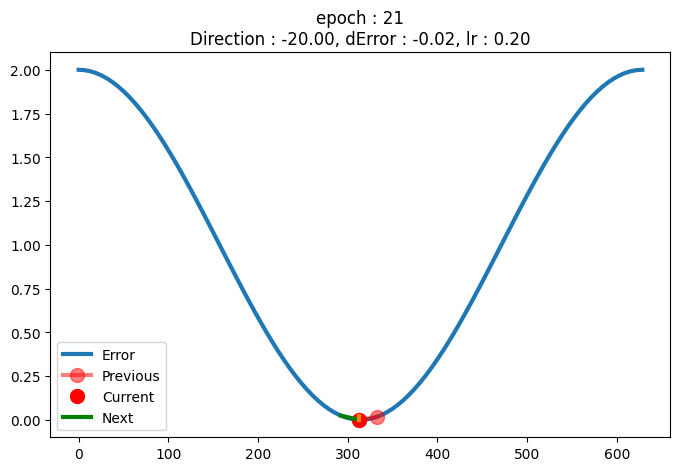

error: [-0.23008885598700246, -0.09244856842985316, -0.05544627202975605, -0.016233507734662145, 0.023626435286016823, -0.023626435286016823, 0.016233507734662145, -0.016233507734662145, 0.023626435286016823, -0.023626435286016823, 0.016233507734662145, -0.016233507734662145, 0.023626435286016823, -0.023626435286016823, 0.016233507734662145, -0.016233507734662145, 0.023626435286016823, -0.023626435286016823, 0.016233507734662145, -0.016233507734662145]


In [8]:
from IPython import display

error=[]
lr=[]

for i in range(20):
  px, py = cx, cy # previous
  cx, cy = nx, ny # current
  d_error = get_error(cy, py)
  error.append(d_error)
  current_direction = get_direction(d_error, px, cx) * learning_rate
  nx = cx + current_direction
  ny = get_y(nx)

  display.clear_output(wait=True)
  display.display(plt.gcf())

  plt.plot(x,y)
  plt.plot([px, cx], [py, cy], 'r.-', alpha=0.5)
  plt.plot(cx, cy, 'r.')
  plt.plot([cx, nx], [cy, ny], 'g-')
  plt.plot([cx, cx], [cy, ny])
  set_title((i+2), current_direction, d_error, learning_rate)
  plt.legend(['Error', 'Previous', 'Current', 'Next'])
  plt.show(block=False)
  plt.pause(0.5)
print('error:',error)

2) 경사하강법-국소최적해 1

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'medium',
          'figure.figsize': (8, 5),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium',
          'lines.markersize': 20,
          'lines.linewidth': 3}

pylab.rcParams.update(params)

In [11]:
X_SCALE = 100

In [12]:
#2차 실험

def get_y(x):
  xn = x/X_SCALE #추가
  return np.cos(xn) + (np.sin(xn*10)*0.3)

In [13]:
def get_direction(error, px, cx):
  x_dir = (((cx-px) > 0)-0.5) * 2
  error_dir = -((error > 0)-0.5) * 2
  gradient_dir = x_dir * error_dir
  return gradient_dir * X_SCALE

def get_error(cy, py):
  return cy-py

In [14]:
def set_title(epoch, direction, error, lr):
  title_str = "epoch : %d\nDirection : %.2f, dError : %.2f, lr : %.2f" % (epoch, direction, error, lr)

  plt.title(title_str)

In [15]:
N = 100

x = np.linspace(0, np.pi*2, N) * X_SCALE
y = get_y(x)
p = np.random.randint(0, x.shape[0]-1)
cx = x[p]
cy = y[p]

global global_n
global_n = 0

In [16]:
#2차 실험(학습률을 바꾸면서 테스트) - 국소 최적해와 전역 최적해

learning_rate = 0.1
#learning_rate = 0.5
current_direction = (np.random.rand() - 0.5) * 100
nx = cx + current_direction
ny = get_y(nx)

<Figure size 800x500 with 0 Axes>

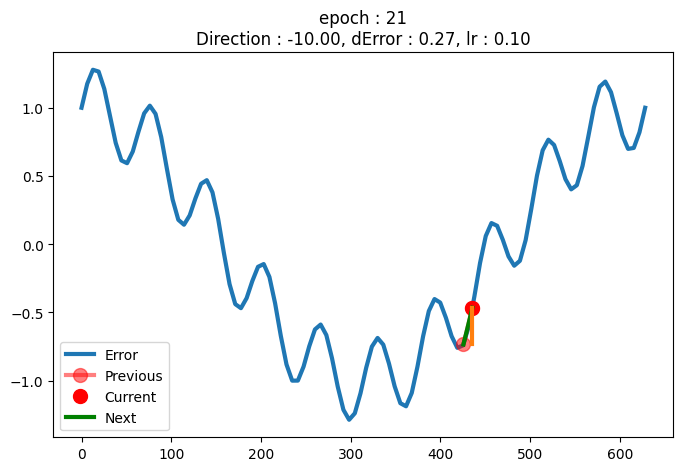

error: [-0.0400519171642969, -0.1975378032684174, -0.007356342253197923, 0.2691511037101983, -0.2691511037101983, 0.007356342253197923, -0.007356342253197923, 0.2691511037101983, -0.2691511037101983, 0.007356342253197923, -0.007356342253197923, 0.2691511037101983, -0.2691511037101983, 0.007356342253197923, -0.007356342253197923, 0.2691511037101983, -0.2691511037101983, 0.007356342253197923, -0.007356342253197923, 0.2691511037101983]


In [17]:
from IPython import display

error=[]

for i in range(20):
  px, py = cx, cy # previous
  cx, cy = nx, ny # current

  d_error = get_error(cy, py)
  error.append(d_error)
  
  current_direction = get_direction(d_error, px, cx) * learning_rate
  
  nx = cx + current_direction
  ny = get_y(nx)

  display.clear_output(wait=True)
  display.display(plt.gcf())

  plt.plot(x,y)
  plt.plot([px, cx], [py, cy], 'r.-', alpha=0.5)
  plt.plot(cx, cy, 'r.')
  plt.plot([cx, nx], [cy, ny], 'g-')
  plt.plot([cx, cx], [cy, ny])
  set_title((i+2), current_direction, d_error, learning_rate)
  plt.legend(['Error', 'Previous', 'Current', 'Next'])
  plt.show(block=False)
  plt.pause(0.5)
print('error:',error)

3) 경사하강법-국소최적해 2

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'medium',
          'figure.figsize': (8, 5),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium',
          'lines.markersize': 20,
          'lines.linewidth': 3}

pylab.rcParams.update(params)

In [38]:
X_SCALE = 100

In [39]:
def get_y(x):
  xn = x/X_SCALE
  return np.cos(xn) + (np.sin(xn*10)*0.3)

In [40]:
def get_direction(error, px, cx):
  x_dir = (((cx-px) > 0)-0.5) * 2
  error_dir = -((error > 0)-0.5) * 2
  gradient_dir = x_dir * error_dir
  return gradient_dir * X_SCALE

def get_error(cy, py):
  return cy-py

In [41]:
def set_title(epoch, direction, error, lr):
  title_str = "epoch : %d\nDirection : %.2f, dError : %.2f, lr : %.5f" % (epoch, direction, error, lr)

  plt.title(title_str)

In [42]:
N = 100

x = np.linspace(0, np.pi*2, N) * X_SCALE
y = get_y(x)
p = np.random.randint(0, x.shape[0]-1)
cx = x[p]
cy = y[p]

global global_n
global_n = 0

In [43]:
#국소 최적해 문제를 해결하기 위한 방안 : rmsprop, Adagrad 등의 알고리즘

#3차 실험(학습률을 바꾸면서 테스트)

#learning_rate = 0.5
learning_rate = 3.0

current_direction = (np.random.rand() - 0.5) * 100

nx = cx + current_direction
ny = get_y(nx)

<Figure size 800x500 with 0 Axes>

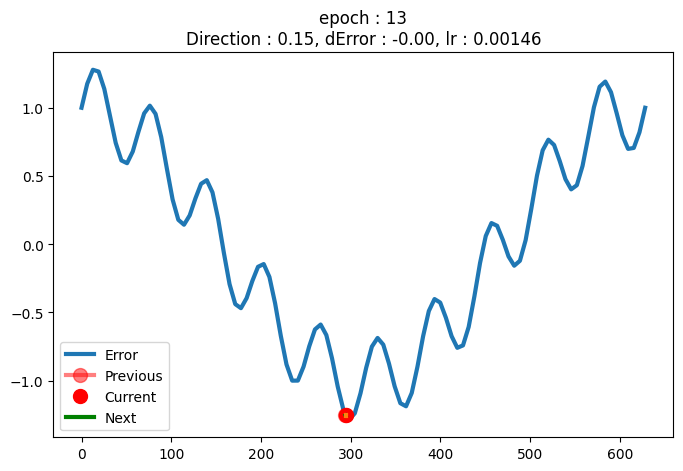

error: [0.010980601912103649, 1.0058347785481114, -1.0058347785481114, -0.7725098037307869, 0.26197756171342346, -0.48049653131834913, -0.008493401208087503, 0.0912001793783288, -0.05254159073742892, -0.02119896722157244, -0.009211402613096054, -0.004246107058677451]
lr: [1.5, 1.5, 0.75, 0.375, 0.1875, 0.09375, 0.046875, 0.0234375, 0.01171875, 0.005859375, 0.0029296875, 0.00146484375]


In [44]:
from IPython import display

error=[]
lr=[] #추가

for i in range(20):
  px, py = cx, cy # previous
  cx, cy = nx, ny # current
  d_error = get_error(cy, py)
  #3차 실험(학습률 조절)
  if d_error<1.0:    
    learning_rate=(learning_rate * 0.5)
    if learning_rate < 1e-3:
      break

  error.append(d_error)
  lr.append(learning_rate) #추가

  current_direction = get_direction(d_error, px, cx) * learning_rate

  nx = cx + current_direction
  ny = get_y(nx)

  display.clear_output(wait=True)
  display.display(plt.gcf())

  plt.plot(x,y)
  plt.plot([px, cx], [py, cy], 'r.-', alpha=0.5)
  plt.plot(cx, cy, 'r.')
  plt.plot([cx, nx], [cy, ny], 'g-')
  plt.plot([cx, cx], [cy, ny])
  set_title((i+2), current_direction, d_error, learning_rate)
  plt.legend(['Error', 'Previous', 'Current', 'Next'])
  plt.show(block=False)
  plt.pause(0.5)
print('error:',error)
print('lr:',lr) #추가